<a href="https://colab.research.google.com/github/hoangson281205/ueh-ktlt-eco/blob/main/Lib2(2_2_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# BƯỚC 1 — Import thư viện và thiết lập hiển thị
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Hiển thị đồ họa trong notebook
%matplotlib inline
plt.rcParams['figure.dpi'] = 120
sns.set(style='whitegrid')

print("✅ Libraries imported. Ready for data loading.")


✅ Libraries imported. Ready for data loading.


In [3]:
# BƯỚC 2 — Nạp dữ liệu diabetes.csv (Pima Indians Diabetes dataset)

import os

# Kiểm tra file trong môi trường
if not os.path.exists('diabetes.csv'):
    from google.colab import files
    print("📂 Chưa thấy file 'diabetes.csv' — hãy chọn file từ máy bạn để upload:")
    uploaded = files.upload()

# Đọc file vào DataFrame
df = pd.read_csv('diabetes.csv')

# Thông tin tổng quát
print("✅ Dữ liệu đã nạp thành công.")
print("Shape (số hàng, số cột):", df.shape)
print("\nCác cột trong dữ liệu:")
print(df.columns.tolist())

# Xem 5 dòng đầu
display(df.head())

# Thông tin chi tiết kiểu dữ liệu
display(df.info())


📂 Chưa thấy file 'diabetes.csv' — hãy chọn file từ máy bạn để upload:


Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [4]:
# BƯỚC 2 (SỬA LẠI) — Tự nhận diện tên file đã upload

import os, pandas as pd

# Nếu chưa upload, yêu cầu upload
from google.colab import files
uploaded = files.upload()

# Lấy tên file vừa upload (tự động nhận)
filename = list(uploaded.keys())[0]
print(f"📄 File bạn vừa upload: {filename}")

# Đọc dữ liệu
df = pd.read_csv(filename)

print("✅ Dữ liệu đã nạp thành công.")
print("Shape (số hàng, số cột):", df.shape)
print("\nCác cột trong dữ liệu:")
print(df.columns.tolist())

# Xem 5 dòng đầu
display(df.head())

# Thông tin chi tiết kiểu dữ liệu
display(df.info())


Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset (1).csv
📄 File bạn vừa upload: diabetes_prediction_dataset (1).csv
✅ Dữ liệu đã nạp thành công.
Shape (số hàng, số cột): (100000, 9)

Các cột trong dữ liệu:
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


None

Số dòng và cột: (100000, 9)

Tên các cột: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0



Giá trị thiếu (missing values):
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Mô tả thống kê các biến số:


,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00



Các cột dạng phân loại: ['gender', 'smoking_history']

Phân phối giá trị trong cột 'gender':
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Phân phối giá trị trong cột 'smoking_history':
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

Biến mục tiêu được chọn: diabetes
diabetes
0    91500
1     8500
Name: count, dtype: int64


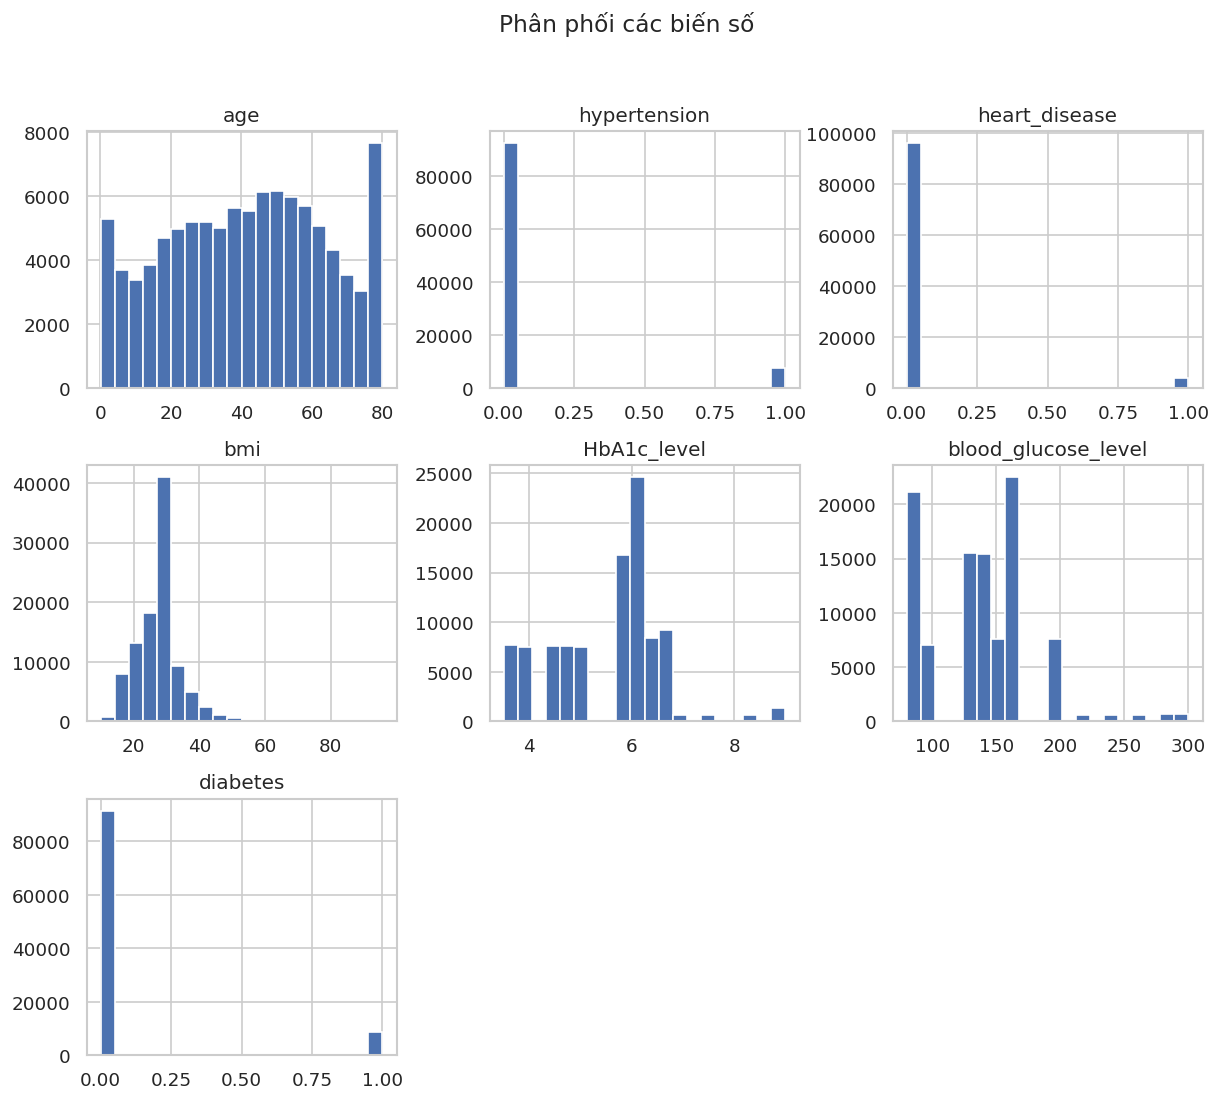

In [5]:
# BƯỚC 3 — EDA cơ bản

# 1️⃣ Tổng quan dữ liệu
print("Số dòng và cột:", df.shape)
print("\nTên các cột:", df.columns.tolist())
display(df.head())

# 2️⃣ Kiểm tra giá trị bị thiếu
print("\nGiá trị thiếu (missing values):")
print(df.isnull().sum())

# 3️⃣ Thống kê mô tả
print("\nMô tả thống kê các biến số:")
display(df.describe().T)

# 4️⃣ Kiểm tra các biến phân loại (nếu có)
cat_cols = df.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    print("\nCác cột dạng phân loại:", list(cat_cols))
    for col in cat_cols:
        print(f"\nPhân phối giá trị trong cột '{col}':")
        print(df[col].value_counts())
else:
    print("\n✅ Không có cột phân loại dạng object.")

# 5️⃣ Kiểm tra phân phối của biến mục tiêu
target_candidates = [c for c in df.columns if c.lower() in ['outcome','diabetes','class','target']]
target = target_candidates[0] if target_candidates else df.columns[-1]
print(f"\nBiến mục tiêu được chọn: {target}")
print(df[target].value_counts())

# 6️⃣ Biểu đồ phân phối (histogram) cho các biến số
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols].hist(figsize=(12,10), bins=20)
plt.suptitle('Phân phối các biến số', fontsize=14)
plt.show()


In [6]:
# BƯỚC 4 — Tiền xử lý dữ liệu cho SVM

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1️⃣ Xác định cột mục tiêu (label)
target_candidates = [c for c in df.columns if c.lower() in ['outcome', 'diabetes', 'class', 'target']]
label_col = target_candidates[0] if target_candidates else df.columns[-1]
print("🎯 Cột mục tiêu được chọn:", label_col)

# 2️⃣ Encode các biến phân loại (nếu có)
cat_cols = df.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    print("Các cột phân loại cần mã hóa:", list(cat_cols))
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
else:
    print("✅ Không có cột phân loại cần mã hóa.")

# 3️⃣ Tách X, y
X = df.drop(columns=[label_col])
y = df[label_col]

# 4️⃣ Scale dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=101, stratify=y
)

print(f"✅ Dữ liệu đã chia xong:")
print(f" - X_train: {X_train.shape}")
print(f" - X_test : {X_test.shape}")
print(f" - Tỉ lệ nhãn trong train:\n{y_train.value_counts(normalize=True).round(3)}")


🎯 Cột mục tiêu được chọn: diabetes
Các cột phân loại cần mã hóa: ['gender', 'smoking_history']
✅ Dữ liệu đã chia xong:
 - X_train: (80000, 8)
 - X_test : (20000, 8)
 - Tỉ lệ nhãn trong train:
diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


Giải thích:

LabelEncoder() giúp biến đổi dữ liệu kiểu chữ (Male/Female, Yes/No,...) thành số để mô hình hiểu được.

StandardScaler() giúp đưa các biến về cùng thang đo (trung bình 0, độ lệch chuẩn 1).

train_test_split(..., stratify=y) đảm bảo tỉ lệ nhãn 0/1 trong train và test tương tự như ban đầu.

🎯 Kết quả mô hình SVM (kernel = 'rbf'):
 - Train Accuracy : 0.9642
 - Test Accuracy  : 0.9639
 - Test ROC AUC   : 0.9319

📋 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18300
           1       0.98      0.59      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.97      0.79      0.86     20000
weighted avg       0.96      0.96      0.96     20000



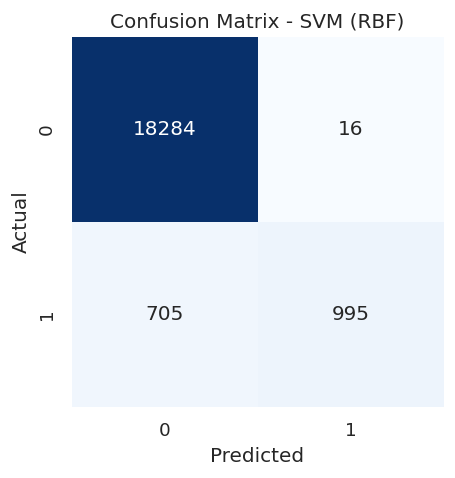

In [8]:
# BƯỚC 5 — Huấn luyện mô hình SVM cơ bản (kernel RBF mặc định)

from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# 1️⃣ Khởi tạo mô hình SVM cơ bản
svm_model = svm.SVC(kernel='rbf', probability=True, random_state=42)

# 2️⃣ Huấn luyện mô hình trên tập train
svm_model.fit(X_train, y_train)

# 3️⃣ Dự đoán trên train và test
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# 4️⃣ Tính độ chính xác và ROC-AUC
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
y_test_proba = svm_model.predict_proba(X_test)[:, 1]
test_roc = roc_auc_score(y_test, y_test_proba)

# 5️⃣ In kết quả
print("🎯 Kết quả mô hình SVM (kernel = 'rbf'):")
print(f" - Train Accuracy : {train_acc:.4f}")
print(f" - Test Accuracy  : {test_acc:.4f}")
print(f" - Test ROC AUC   : {test_roc:.4f}")

# 6️⃣ Báo cáo chi tiết
print("\n📋 Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

# 7️⃣ Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - SVM (RBF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


⚡ Dữ liệu giảm còn: 3200 train | 800 test

🔍 Đang huấn luyện và đánh giá từng kernel...

Kernel: linear   | Test Accuracy: 0.9613
Kernel: rbf      | Test Accuracy: 0.9537
Kernel: sigmoid  | Test Accuracy: 0.9025

📊 Kết quả so sánh các kernel:


,Kernel,Accuracy
0,linear,0.96125
1,rbf,0.95375
2,sigmoid,0.90250


/tmp/ipython-input-891833009.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Kernel', y='Accuracy', palette='crest')


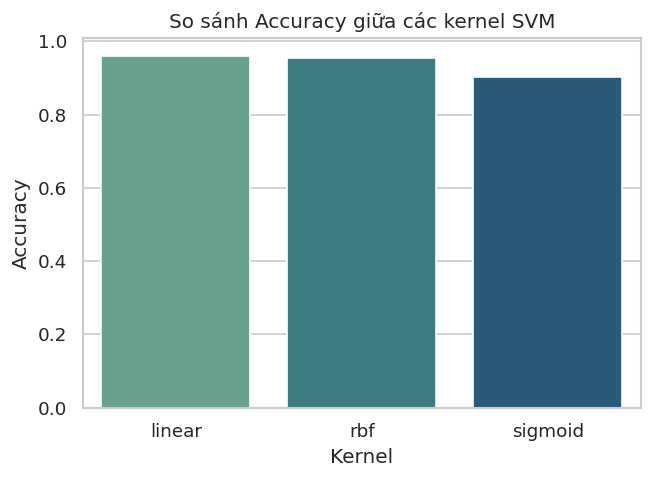

In [14]:
# === BƯỚC 6 — So sánh các kernel của SVM (tối ưu cho Colab) ===
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 1️⃣ Giảm dữ liệu cho nhẹ (khoảng 4000 mẫu)
X_small, _, y_small, _ = train_test_split(
    X_scaled, y, train_size=4000, random_state=42, stratify=y
)
X_train, X_test, y_train, y_test = train_test_split(
    X_small, y_small, test_size=0.2, random_state=42, stratify=y_small
)
print(f"⚡ Dữ liệu giảm còn: {X_train.shape[0]} train | {X_test.shape[0]} test")

# 2️⃣ Thử các kernel khác nhau
kernels = ['linear', 'rbf', 'sigmoid']   # bỏ 'poly' để tránh treo
results = []

print("\n🔍 Đang huấn luyện và đánh giá từng kernel...\n")
for k in kernels:
    clf = svm.SVC(kernel=k, random_state=42)   # không dùng probability để tăng tốc
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Kernel': k, 'Accuracy': acc})
    print(f"Kernel: {k:<8} | Test Accuracy: {acc:.4f}")

# 3️⃣ Tổng hợp kết quả
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\n📊 Kết quả so sánh các kernel:")
display(results_df)

# 4️⃣ Biểu đồ trực quan
plt.figure(figsize=(6,4))
sns.barplot(data=results_df, x='Kernel', y='Accuracy', palette='crest')
plt.title('So sánh Accuracy giữa các kernel SVM')
plt.show()


## 🧩 Nhiệm vụ 2: Tìm tham số tối ưu cho mô hình SVM bằng GridSearchCV
Trong nhiệm vụ này, ta sử dụng `GridSearchCV` để tìm tổ hợp tham số tốt nhất (`C`, `gamma`, `kernel`) cho mô hình SVM trên tập dữ liệu bệnh tiểu đường.  
Sau đó đánh giá lại mô hình tối ưu trên tập kiểm tra (test set).


In [15]:
# === NHIỆM VỤ 2 — TÌM THAM SỐ TỐI ƯU CHO MÔ HÌNH SVM ===

# Import thư viện
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

# 1️⃣ Giảm dữ liệu để GridSearch chạy nhanh hơn
# (vì dữ liệu thật khá lớn, SVM với cross-validation sẽ rất nặng)
X_small, _, y_small, _ = train_test_split(
    X_scaled, y, train_size=4000, random_state=42, stratify=y
)
X_train, X_test, y_train, y_test = train_test_split(
    X_small, y_small, test_size=0.2, random_state=42, stratify=y_small
)
print(f"⚡ Dữ liệu dùng cho GridSearch: {X_train.shape[0]} train | {X_test.shape[0]} test")

# 2️⃣ Khởi tạo mô hình SVM cơ bản
svm_clf = svm.SVC(probability=True, random_state=42)

# 3️⃣ Thiết lập lưới tham số (grid) cần tìm
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

# 4️⃣ Khởi tạo GridSearchCV với 3-fold cross-validation
cv_svm = GridSearchCV(
    estimator=svm_clf,
    param_grid=param_grid,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# 5️⃣ Huấn luyện mô hình
cv_svm.fit(X_train, y_train)

# 6️⃣ In ra tham số tối ưu và điểm trung bình cao nhất
print("\n✅ Tham số tối ưu tìm được:")
print(cv_svm.best_params_)
print(f"📈 Điểm trung bình (CV best score): {cv_svm.best_score_:.4f}")

# 7️⃣ Đánh giá mô hình tối ưu trên tập test
best_svm = cv_svm.best_estimator_
y_test_pred = best_svm.predict(X_test)
y_test_proba = best_svm.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_test_pred)
roc = roc_auc_score(y_test, y_test_proba)

print("\n🎯 Kết quả mô hình tối ưu trên tập test:")
print(f" - Accuracy: {acc:.4f}")
print(f" - ROC AUC : {roc:.4f}")

# 8️⃣ Lưu kết quả nếu cần nộp
cv_results = pd.DataFrame(cv_svm.cv_results_)
cv_results.to_csv("svm_gridsearch_results.csv", index=False)
print("\n📂 Kết quả GridSearch đã lưu thành 'svm_gridsearch_results.csv'")


⚡ Dữ liệu dùng cho GridSearch: 3200 train | 800 test
Fitting 3 folds for each of 18 candidates, totalling 54 fits

✅ Tham số tối ưu tìm được:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
📈 Điểm trung bình (CV best score): 0.9644

🎯 Kết quả mô hình tối ưu trên tập test:
 - Accuracy: 0.9600
 - ROC AUC : 0.8653

📂 Kết quả GridSearch đã lưu thành 'svm_gridsearch_results.csv'


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


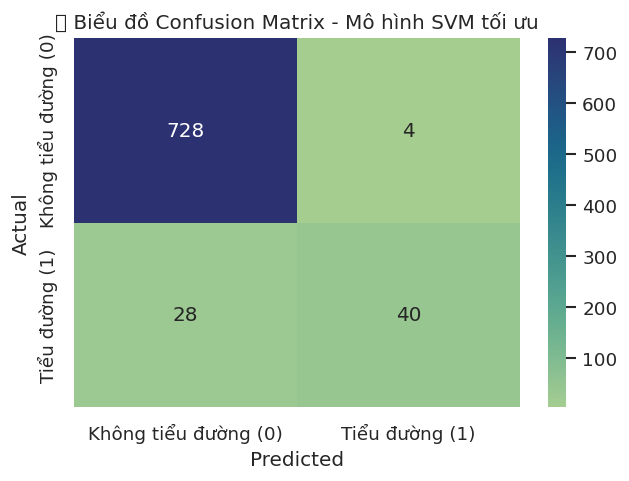


📊 Báo cáo phân loại (Classification Report):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       732
           1       0.91      0.59      0.71        68

    accuracy                           0.96       800
   macro avg       0.94      0.79      0.85       800
weighted avg       0.96      0.96      0.96       800



In [16]:
# === TIẾP THEO TRONG NHIỆM VỤ 2: VẼ HEATMAP ĐÁNH GIÁ MÔ HÌNH ===

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Dự đoán lại trên tập test bằng mô hình tối ưu
y_pred = best_svm.predict(X_test)

# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ heatmap trực quan
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest',
            xticklabels=['Không tiểu đường (0)', 'Tiểu đường (1)'],
            yticklabels=['Không tiểu đường (0)', 'Tiểu đường (1)'])
plt.title('🔹 Biểu đồ Confusion Matrix - Mô hình SVM tối ưu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# In thêm báo cáo chi tiết
print("\n📊 Báo cáo phân loại (Classification Report):")
print(classification_report(y_test, y_pred))


In [17]:
# === BỔ SUNG: HIỂN THỊ THÔNG TIN ĐÁNH GIÁ MÔ HÌNH TRÊN TỪNG LỚP ===
# (Tương ứng Hình 2.6 trong bài mẫu)

from sklearn.metrics import classification_report
import pandas as pd

# Lấy classification report dạng dict để dễ chuyển thành DataFrame
report_dict = classification_report(y_test, y_pred, target_names=['Không tiểu đường', 'Tiểu đường'], output_dict=True)

# Chuyển thành DataFrame cho dễ nhìn
report_df = pd.DataFrame(report_dict).transpose()

# Hiển thị kết quả
print("📊 Thông tin đánh giá về hiệu quả của mô hình trên từng lớp:")
display(report_df.style.background_gradient(cmap="crest").format({"precision":"{:.2f}", "recall":"{:.2f}", "f1-score":"{:.2f}", "support":"{:.0f}"}))


📊 Thông tin đánh giá về hiệu quả của mô hình trên từng lớp:


,precision,recall,f1-score,support
Không tiểu đường,0.96,0.99,0.98,732
Tiểu đường,0.91,0.59,0.71,68
accuracy,0.96,0.96,0.96,1
macro avg,0.94,0.79,0.85,800
weighted avg,0.96,0.96,0.96,800
